<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/modpred_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Grupo 3:**
* *Anna Carolina de Roldão*
* *Arthur Lira*
* *Erike Simon*
* *José Aparecido Silvano*
* *Yaci Mair da Silva Ribeiro*


# K Nearest Neighbors - Projeto

O objetivo deste exercício é dar continuidade com os estudos de Análise Exploratória dos Dados (EDA) e já começar a treinar modelos de classificação com k-NN conforme visto em sala de aula.

Vamos utilizar a base de dados Wine da [UCI](https://archive.ics.uci.edu/ml/datasets/wine+quality). A variável de resposta que temos que modelar é a qualidade do vinho (quality).

Nesse repositório, há dois conjuntos de dados, um com informações de vinho vermelho e outra para vinho branco. Esses dados foram extraídos de uma vinícula do Norte de Portugal. Para este exercício, vamos utilizar a base de dados de vinho.

Dicionário da base de dados:
1. acidez fixa / fixed acidity.
2. acidez volátil / volatile acidity
3. ácido cítrico / citric acid
4. açúcar residual / residual sugar
5. cloretos / chlorides
6. dióxido de enxofre livre / free sulfur dioxide
7. dióxido de enxofre total / total sulfur dioxide
8. densidade / density
9. pH / pH
10. sulfatos / sulphates
11. álcool/ alcohol
12. **qualidade - quality (score between 0 and 10)**


## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [ ]:
# Ignorar os avisos do tipo SettingWithCopyWarning
warnings.filterwarnings('ignore')

## Obtenha os dados
** Leia o arquivo csv 'winequality-white.csv' em um DataFrame **

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

** Verifique o cabeçalho do DataFrame.**

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Análise descritiva dos dados

Info - Informações básica do conjunto de dados, tais como tipo de dado e dados faltantes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Describe - Informações de estatística descritiva de dados, tais como média, mediana e desvio-padrão.

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


missingno - Analisa se há dados faltantes ou não.
https://github.com/ResidentMario/missingno

In [ ]:
import missingno as msno
%matplotlib inline

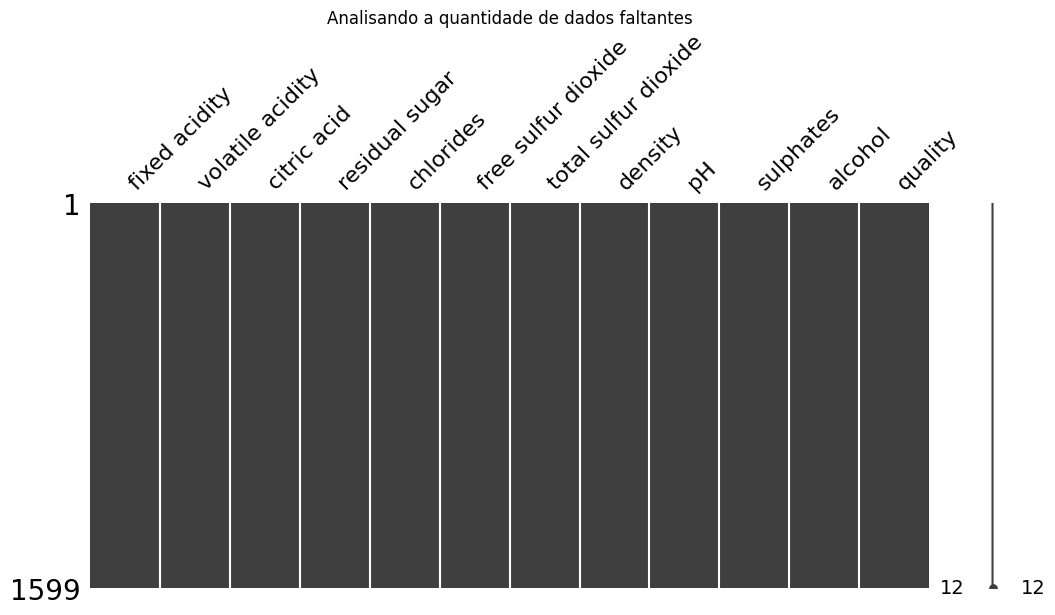

In [ ]:
msno.matrix(df, figsize=(12,5))
plt.title("Analisando a quantidade de dados faltantes")
plt.show()

Histograma - Verifica a distribuição dos dados.

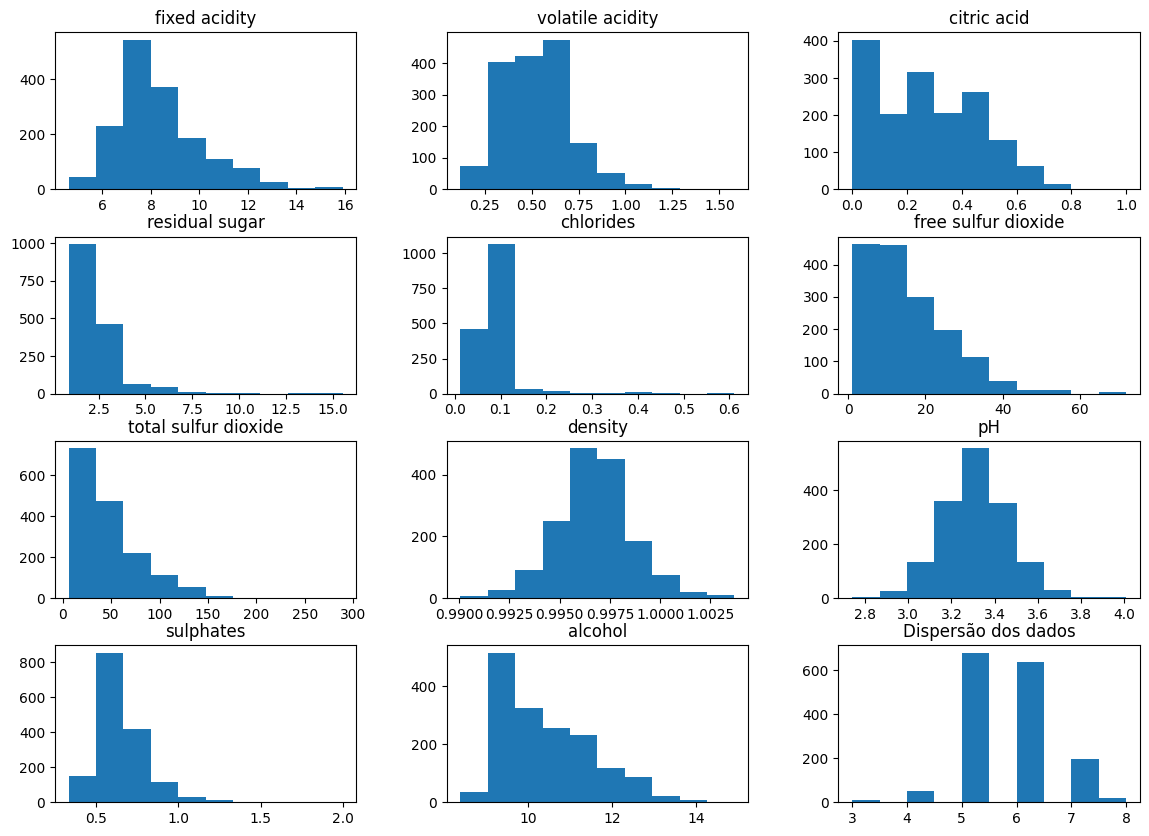

In [ ]:
fig = plt.figure(figsize = (14,10))
ax = fig.gca()
df.hist(ax = ax, grid=False)
plt.title("Dispersão dos dados")
plt.show()

Análise de Correlação - Verifica a corelação linear entre os dados

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='vol

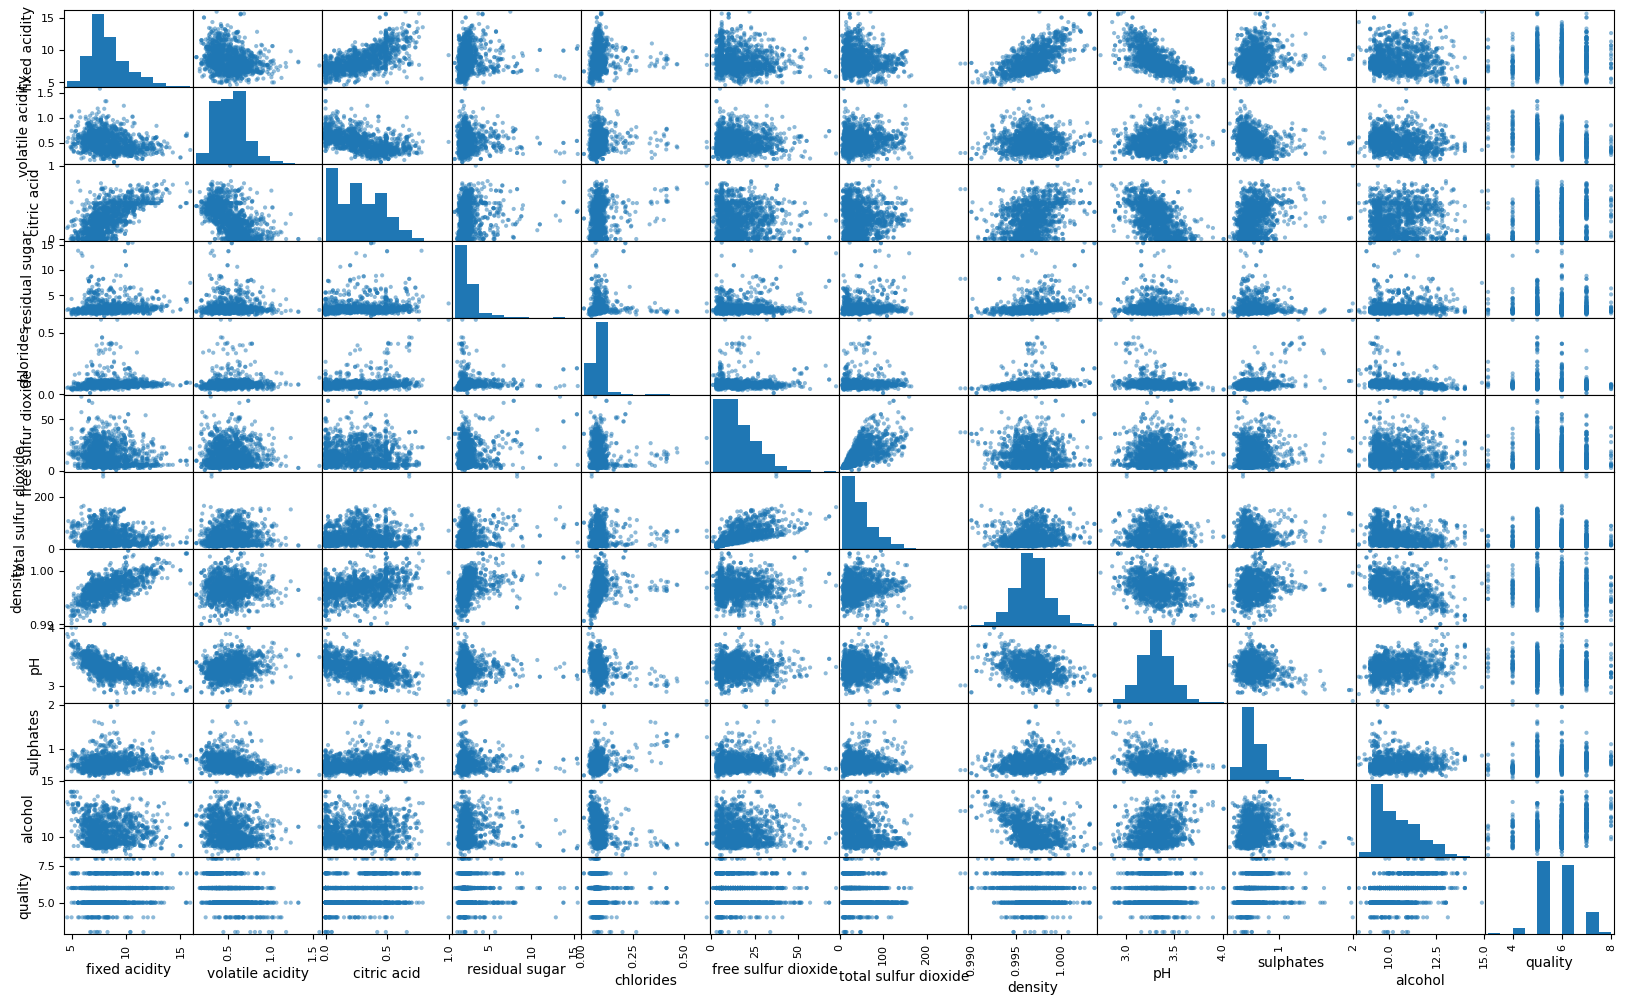

In [ ]:
from pandas.plotting import scatter_matrix

#attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df, figsize=(20, 12))

# Divisão treino-teste

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#                                                   # 1 parametro: X, 2 parametro: Y
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['quality']),
                                                    df['quality'],
                                                    test_size=0.25,
                                                    random_state=111)

**Dados de treino**

Features

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>, <Axes: >]], dtype=object)

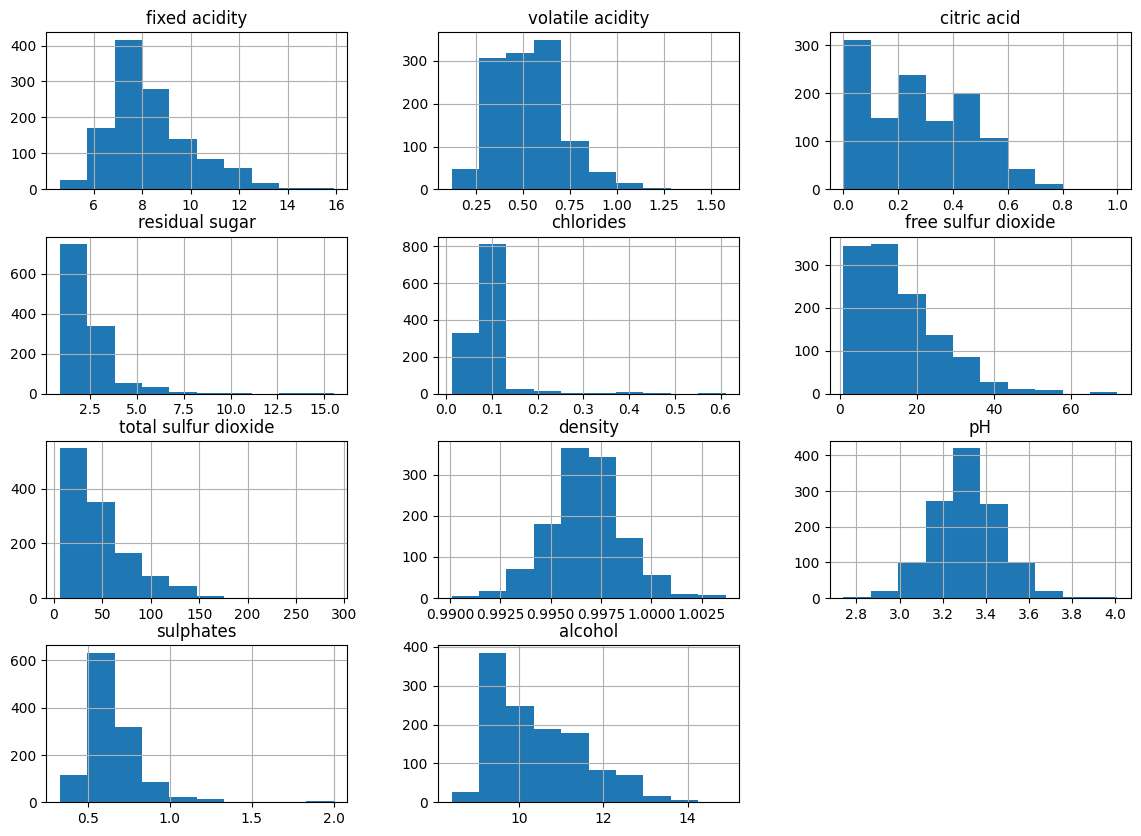

In [ ]:
# Também para analizar o que deve ser ou não normalizado e o tipo de normalização a depender a distribuição dos dados
X_train.hist(figsize=(14,10))

In [ ]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
169,7.5,0.705,0.24,1.8,0.360,15.0,63.0,0.99640,3.00,1.59,9.5
1219,9.0,0.390,0.40,1.3,0.044,25.0,50.0,0.99478,3.20,0.83,10.9
1158,6.7,0.410,0.43,2.8,0.076,22.0,54.0,0.99572,3.42,1.16,10.6
976,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4
654,8.6,0.470,0.47,2.4,0.074,7.0,29.0,0.99790,3.08,0.46,9.5
...,...,...,...,...,...,...,...,...,...,...,...
681,8.0,0.450,0.23,2.2,0.094,16.0,29.0,0.99620,3.21,0.49,10.2
1299,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9
724,7.5,1.115,0.10,3.1,0.086,5.0,12.0,0.99580,3.54,0.60,11.2


Target

In [ ]:
pd.DataFrame(y_train)

,quality
169,5
1219,6
1158,6
976,5
654,5
...,...
681,6
1299,3
86,6
724,4


**Dados de teste**

Features

In [ ]:
# para analizar o que deve ser normalizado ou não.
# Caso as médias e os desvios padrões estejam muito discrepantes em relação aos demais,
# uma normalização será necessária.
# A princípio, normalizar todos os dados (menos os binários) e analizar o desempenho.
X_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,8.324000,0.515213,0.271175,2.495375,0.084417,15.928750,47.203750,0.996718,3.312950,0.651975,10.428042
std,1.844228,0.168459,0.191953,1.254759,0.039871,10.428263,32.954006,0.001993,0.153555,0.147349,1.062981
min,4.900000,0.120000,0.000000,1.300000,0.038000,3.000000,8.000000,0.990840,2.920000,0.390000,8.400000
25%,7.100000,0.390000,0.100000,1.900000,0.068000,7.000000,23.000000,0.995507,3.200000,0.560000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.078000,13.500000,38.000000,0.996570,3.320000,0.620000,10.200000
75%,9.200000,0.621250,0.402500,2.600000,0.089000,23.000000,62.250000,0.997860,3.410000,0.710000,11.100000
max,15.600000,1.020000,0.780000,13.900000,0.401000,66.000000,278.000000,1.003200,3.780000,1.610000,14.000000


Target

In [ ]:
pd.DataFrame(y_test)

,quality
660,6
1351,6
230,7
1111,7
444,7
...,...
1345,6
139,5
926,6
929,7


# Padronize as variáveis

Normalizar os dados. Utilize o StandardScaler do Scikit-learn.

obs:
- Caso algum dado seja binário, não normalizar;
- Não normalizar Y.

In [ ]:
from sklearn.preprocessing import StandardScaler

Normalize as variáveis independentes com o StandardScaler

In [ ]:
# Normalizar todas as features como primeira abordagem
sc = StandardScaler().fit(X_train)

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [ ]:
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

Análise descritiva dos dados através do describe

In [ ]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03,1.199000e+03
mean,-7.111353e-17,-1.718577e-16,1.659316e-16,-1.333379e-16,-1.155595e-16,2.074145e-17,-8.889192e-17,7.994347e-15,-2.814911e-16,-1.363009e-16,3.022325e-16
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00
min,-2.180251e+00,-2.260693e+00,-1.384028e+00,-1.134243e+00,-1.555025e+00,-1.418910e+00,-1.223599e+00,-3.612755e+00,-3.688806e+00,-1.873885e+00,-1.895163e+00
25%,-7.143121e-01,-7.381162e-01,-9.242331e-01,-4.481928e-01,-3.554698e-01,-7.981295e-01,-7.368639e-01,-5.814678e-01,-6.498270e-01,-6.254171e-01,-8.638051e-01
50%,-2.452116e-01,-6.598761e-02,-5.573265e-02,-2.423777e-01,-1.724867e-01,-1.773488e-01,-2.501290e-01,2.370901e-02,-3.235653e-03,-2.281774e-01,-2.074863e-01
75%,5.170767e-01,6.061410e-01,8.127678e-01,3.204238e-02,5.115929e-02,4.911842e-01,4.799732e-01,5.775539e-01,5.786965e-01,4.528050e-01,6.363521e-01
max,4.445793e+00,5.749982e+00,3.724799e+00,8.882091e+00,1.062351e+01,5.361925e+00,7.385524e+00,3.746627e+00,4.522904e+00,7.603120e+00,4.199226e+00


Normalize os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou.

In [ ]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.479762,0.949064,-0.157909,-0.516798,5.520320,-0.081844,0.510394,-0.192426,-2.007669,5.276430,-0.863805
1,0.399802,-0.779267,0.659503,-0.859823,-0.904419,0.873203,0.114922,-1.067771,-0.714486,0.963542,0.448832
2,-0.948862,-0.669532,0.812768,0.169252,-0.253812,0.586689,0.236606,-0.559854,0.708015,2.836243,0.167553
3,-0.655675,-0.669532,0.148620,-0.310983,-0.111492,1.828250,0.784182,0.131776,0.837333,-0.795663,-0.957565
4,0.165251,-0.340326,1.017121,-0.105168,-0.294475,-0.845882,-0.523917,0.618079,-1.490396,-1.136154,-0.863805


Utilizando o inverse_transform a partir dos dados normalizados para garantir que a normalização está correta.

In [ ]:
# Dataset de teste para verificação do inverse_transform
X_train_origin = sc.inverse_transform(X_train_scaled)

Analisando os dados originais do X_train.

In [ ]:
# Observando os dados convertidos novamente pelo inverse_transform
pd.DataFrame(X_train_origin).head()

,0,1,2,3,4,5,6,7,8,9,10
0,7.5,0.705,0.24,1.8,0.360,15.0,63.0,0.99640,3.00,1.59,9.5
1,9.0,0.390,0.40,1.3,0.044,25.0,50.0,0.99478,3.20,0.83,10.9
2,6.7,0.410,0.43,2.8,0.076,22.0,54.0,0.99572,3.42,1.16,10.6
3,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4
4,8.6,0.470,0.47,2.4,0.074,7.0,29.0,0.99790,3.08,0.46,9.5


In [ ]:
# Dados originais
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
169,7.5,0.705,0.24,1.8,0.360,15.0,63.0,0.99640,3.00,1.59,9.5
1219,9.0,0.390,0.40,1.3,0.044,25.0,50.0,0.99478,3.20,0.83,10.9
1158,6.7,0.410,0.43,2.8,0.076,22.0,54.0,0.99572,3.42,1.16,10.6
976,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4
654,8.6,0.470,0.47,2.4,0.074,7.0,29.0,0.99790,3.08,0.46,9.5


# Usando o KNN

Importe o KNeighborClassifier do scikit learn.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Crie uma instância do modelo KNN com n_neighbors = 1

In [ ]:
# Cria uma instância do KNeighborsClassifier com 1 vizinho
neigh = KNeighborsClassifier(n_neighbors=1)

Ajuste este modelo KNN aos dados de treinamento.

In [ ]:
# Ajustando o modelo aos dados de treinamento escalados
neigh.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

# Previsões e avaliações
Vamos avaliar o nosso modelo KNN!

Use o método de previsão para prever valores usando seu modelo KNN e X_test.

In [ ]:
# Usa o método predict para fazer previsões (y) a partir dos dados de teste (X_test_scaled)
y_pred = neigh.predict(X_test_scaled)

In [ ]:
print(y_pred)

[6 5 5 6 6 5 5 5 5 6 7 6 5 6 6 6 5 5 5 5 6 6 5 7 7 5 7 6 6 5 6 6 6 7 7 5 5
 6 6 5 6 5 5 7 5 5 5 6 6 7 5 6 5 4 6 5 5 6 4 5 6 5 6 7 7 5 5 6 6 5 8 5 5 6
 6 5 6 6 6 6 6 6 6 6 6 5 6 5 6 5 6 6 6 6 5 5 5 5 7 6 5 7 6 6 7 6 5 6 5 5 6
 5 5 7 5 7 4 5 6 6 5 7 5 6 6 6 5 6 5 5 7 5 5 7 8 6 5 5 6 6 5 6 5 6 5 5 4 5
 7 5 5 5 5 7 6 6 6 6 6 5 5 6 6 5 7 5 5 6 6 7 6 5 5 5 7 5 6 6 5 6 6 6 5 5 6
 5 5 7 6 5 5 6 5 6 5 4 6 7 6 6 5 6 6 5 6 5 5 5 5 5 6 5 5 5 5 5 6 6 5 5 5 5
 5 6 7 6 6 6 6 5 6 6 5 6 6 6 7 7 5 5 6 6 7 7 5 6 6 6 6 7 6 6 5 6 5 5 6 6 6
 6 5 6 4 6 5 7 6 5 5 5 6 7 7 6 6 5 5 5 5 5 5 6 6 6 5 3 6 7 6 5 5 6 5 5 6 5
 7 6 7 5 6 6 6 6 5 6 5 6 6 6 5 5 6 5 6 6 7 6 5 7 7 6 5 6 5 4 7 5 5 6 5 6 6
 6 5 8 6 5 5 6 7 7 7 7 5 7 5 5 5 6 5 6 5 5 7 6 6 5 5 5 6 5 6 6 5 5 4 6 6 7
 6 7 5 6 6 4 6 5 6 5 5 6 5 5 6 5 5 5 7 5 5 5 6 6 6 6 5 7 7 6]


Crie uma matriz de confusão e um relatório de classificação.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, accuracy_score

<Figure size 1600x1200 with 0 Axes>

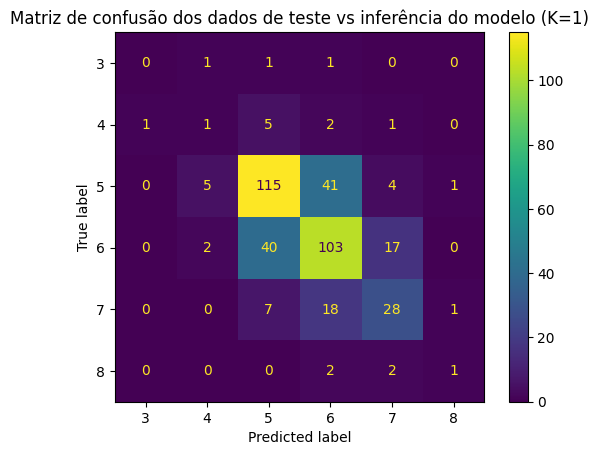

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred) # matriz de confusão para comparar os valores preditos com os valores reais
cmd = ConfusionMatrixDisplay(cm, display_labels=np.sort(y_test.unique()))
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo (K=1)")
plt.show()

Analisando o Classification Report


**Dados de teste**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.11      0.10      0.11        10
           5       0.68      0.69      0.69       166
           6       0.62      0.64      0.63       162
           7       0.54      0.52      0.53        54
           8       0.33      0.20      0.25         5

    accuracy                           0.62       400
   macro avg       0.38      0.36      0.37       400
weighted avg       0.61      0.62      0.62       400



Score do modelo utilizando os dados de teste.

In [ ]:
# O método '.score()' calcula a ACURÁCIA do modelo nos dados de teste
score = neigh.score(X=X_test_scaled, y=y_test)

In [ ]:
print(f"Score do Modelo: {score:.2f}")

Score do Modelo: 0.62


#### Apresente a Curva ROC

Dado que a Curva ROC é uma métrica para valores binários, vamos fazer o cálculo de uma classe e comparar com as demais classes.

Referência:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

**É preciso binarizar as variáveis independentes(????), calcular as probabilidades de cada predição para target e, por fim calcular a curva ROC.**

A abordagem One-vs-Rest (OvR) também é conhecida como One-vs-All (OvA). A ideia básica do OvR é transformar um problema de classificação multiclasse em vários problemas de classificação binária independentes. Para cada classe, um modelo de classificação binária é treinado considerando aquela classe como a classe positiva (1) e todas as outras classes como a classe negativa (0).

O One-Hot Encoding no estilo OvR (One-vs-Rest) é uma técnica usada para lidar com problemas de classificação multiclasse. Nesse contexto, um problema de classificação multiclasse envolve a classificação de instâncias em mais de duas classes.

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

Binarização da variável dependente, 'quality'.

 **LabelBinarizer** é uma classe do scikit-learn que transforma rótulos (classes) em representação binária (one-hot encoding), ou seja, converte valores categóricos em vetores binários.

In [ ]:
# Cria uma instância do LabelBinarizer e a ajusta aos valores da coluna 'quality'
label_binarizer = LabelBinarizer().fit(df['quality'])

In [ ]:
# classes da coluna 'quality'
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
y_onehot_test = label_binarizer.transform(y_test) # Usa o label_binarizer ajustado para transformar as classes do conjunto de teste em representação binária.
y_onehot_test.shape  # (n_samples, n_classes)

(400, 6)

O One-Hot Encoding é uma técnica usada para representar as classes de forma numérica. Ele cria uma matriz em que cada coluna corresponde a uma classe possível e cada linha corresponde a uma instância. Para cada instância, a coluna correspondente à classe real é marcada com 1 e as outras colunas são marcadas com 0.

In [ ]:
pd.DataFrame(y_onehot_test) # rótulos verdadeiros do conjunto de testes

,0,1,2,3,4,5
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
395,0,0,0,1,0,0
396,0,0,1,0,0,0
397,0,0,0,1,0,0
398,0,0,0,0,1,0


Selecionando a qualidade de número **5** pois foi o maior valor obtido pelo modelo.

In [ ]:
class_of_interest = 5
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

* **label_binarizer.classes_** é um atributo do LabelBinarizer que contém as classes únicas presentes nos rótulos originais (antes da transformação em binário).
* **label_binarizer.classes_ == class_of_interest** compara cada classe única com o valor class_of_interest (que é 5 neste caso). Isso cria um array booleano onde os elementos são True nas posições correspondentes às classes que são iguais a 5.
* **np.flatnonzero(...)** retorna os índices dos elementos True no array booleano.
* **[0]** no final pega o primeiro índice (primeira ocorrência da classe de interesse) se houver várias ocorrências iguais.

Ou seja, o índice correspondente a classe 5 é o class_id = 2

Calculando as probabilidades dos dados de teste para fazer o cálculo da curva ROC.

In [ ]:
from sklearn.linear_model import LogisticRegression

# O modelo LogisticRegression pode lidar naturalmente com problemas multiclasse, graças ao uso da formulação multinomial
classifier = LogisticRegression() # O parâmetro padrão multi_class é definido como 'auto'
y_scores = classifier.fit(X_train_scaled, y_train).predict_proba(X_test_scaled)

* O método **fit()** ajusta o modelo de regressão logística aos dados de treinamento. X_train_scaled são as features (características) normalizadas e y_train são os rótulos correspondentes;
* O método **predict_proba()** é usado para obter as probabilidades previstas para cada classe no conjunto de dados de teste normalizado **X_test_scaled**. Isso retorna uma matriz em que cada linha representa uma instância de teste e cada coluna representa a probabilidade de pertencer a uma classe específica. No contexto de regressão logística multiclasse, essa matriz de probabilidades é obtida.

In [ ]:
pd.DataFrame(y_scores)

,0,1,2,3,4,5
0,0.000637,0.016247,0.467228,0.477965,0.036706,0.001216
1,0.000254,0.040068,0.252237,0.594827,0.101549,0.011064
2,0.000008,0.007018,0.301193,0.620505,0.061363,0.009914
3,0.000214,0.015524,0.117306,0.724457,0.134412,0.008087
4,0.000062,0.010966,0.056332,0.619050,0.258943,0.054647
...,...,...,...,...,...,...
395,0.000490,0.029819,0.410702,0.484033,0.072582,0.002373
396,0.000104,0.011342,0.871899,0.114628,0.001960,0.000067
397,0.000003,0.001596,0.109461,0.683067,0.202161,0.003712
398,0.000019,0.006596,0.023609,0.326253,0.602254,0.041269


 A variável **y_scores** conterá as probabilidades previstas para cada classe para cada instância de teste. Isso é frequentemente usado para avaliar o desempenho do modelo, calcular métricas de avaliação como a Curva ROC, a Área sob a Curva (AUC) ou fazer previsões em si, dependendo do cenário.

In [ ]:
def plot_curva_ROC_one_vs_rest(y_test, y_scores):

  RocCurveDisplay.from_predictions(
      y_onehot_test[:, class_id], # [todas as linhas de y_onehot_test, índice da classe de interesse]
      y_scores[:, class_id],
      name=f"{class_of_interest} vs as demais classes",
  )
  plt.plot([0, 1], [0, 1], "k--", label="valor de threashold (AUC = 0.5)")
  plt.axis("square")
  plt.xlabel("Taxa de Falso Positivo")
  plt.ylabel("Taxa de Verdadeira Positivo")
  plt.title("One-vs-Resto curva ROC")
  plt.legend()
  plt.show()

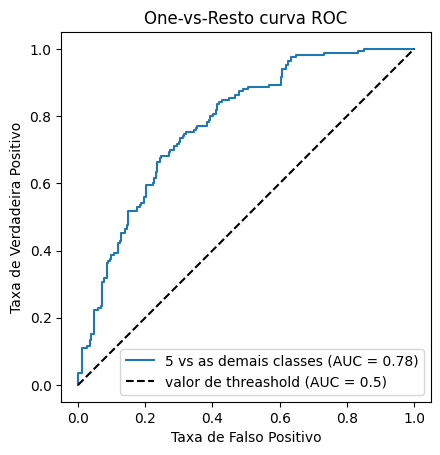

In [ ]:
plot_curva_ROC_one_vs_rest(y_test, y_scores)

Vamos continuar usando o método do cotovelo para escolher um bom valor K!

Crie um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do error_rate para cada um desses modelos com uma lista. Consulte o notebook se você estiver confuso nesta etapa.

In [ ]:
def train_modelo(X_train_scaled, X_test_scaled, y_train, k=1):
  print(f"Treinando o k-NN com k={k}")

  #faça a instância de um novo modelo, treine esse modelo e faça as predições para os dados de teste
  neigh = KNeighborsClassifier(n_neighbors=k)

  neigh.fit(X_train_scaled, y_train)

  pred_i = neigh.predict(X_test_scaled)

  y_scores_i = neigh.predict_proba(X_test_scaled) # Predição dos 'scores' por KNN

  return pred_i, y_scores_i


In [ ]:
error_rate = [] # para armazenar as taxas de erro de cada modelo
res_score = [] # para armazenar os scores (acurácias) de cada modelo


for i in range(1,41):
    pred_i, y_scores_i = train_modelo(X_train_scaled, X_test_scaled, y_train, i)

    # Calcular a acurácia a partir dos targets de teste (y_test) e dos targets preditos (pred_i)
    accuracy = accuracy_score(y_test, pred_i)

    # Calcula a taxa de erro (complemento da acurácia)
    error = round(1 - accuracy, 3)  # taxa de erro mede a proporção de previsões incorretas em relação ao total de previsões

    res_score.append(accuracy)
    error_rate.append(error)

print("\nScores: ", res_score)
print("\nTaxas de erro: ", error_rate)

Treinando o k-NN com k=1
Treinando o k-NN com k=2
Treinando o k-NN com k=3
Treinando o k-NN com k=4
Treinando o k-NN com k=5
Treinando o k-NN com k=6
Treinando o k-NN com k=7
Treinando o k-NN com k=8
Treinando o k-NN com k=9
Treinando o k-NN com k=10
Treinando o k-NN com k=11
Treinando o k-NN com k=12
Treinando o k-NN com k=13
Treinando o k-NN com k=14
Treinando o k-NN com k=15
Treinando o k-NN com k=16
Treinando o k-NN com k=17
Treinando o k-NN com k=18
Treinando o k-NN com k=19
Treinando o k-NN com k=20
Treinando o k-NN com k=21
Treinando o k-NN com k=22
Treinando o k-NN com k=23
Treinando o k-NN com k=24
Treinando o k-NN com k=25
Treinando o k-NN com k=26
Treinando o k-NN com k=27
Treinando o k-NN com k=28
Treinando o k-NN com k=29
Treinando o k-NN com k=30
Treinando o k-NN com k=31
Treinando o k-NN com k=32
Treinando o k-NN com k=33
Treinando o k-NN com k=34
Treinando o k-NN com k=35
Treinando o k-NN com k=36
Treinando o k-NN com k=37
Treinando o k-NN com k=38
Treinando o k-NN com 

Agora crie o seguinte gráfico usando as informações do seu loop.

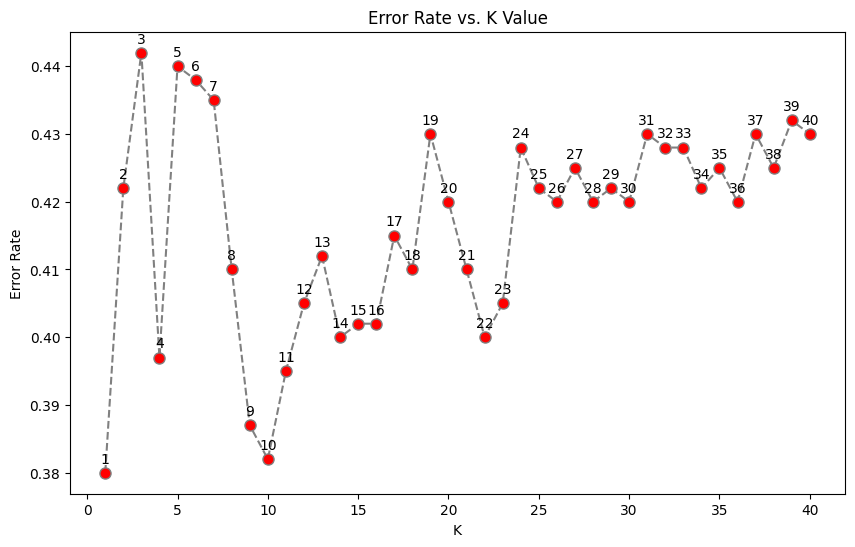

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41),error_rate,color='grey', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Adicionar os valores do eixo x acima de cada marcador
for i, err in enumerate(error_rate):
    plt.text(i+1, err + 0.001, str(i+1), ha='center', va='bottom', fontsize=10)

plt.show()

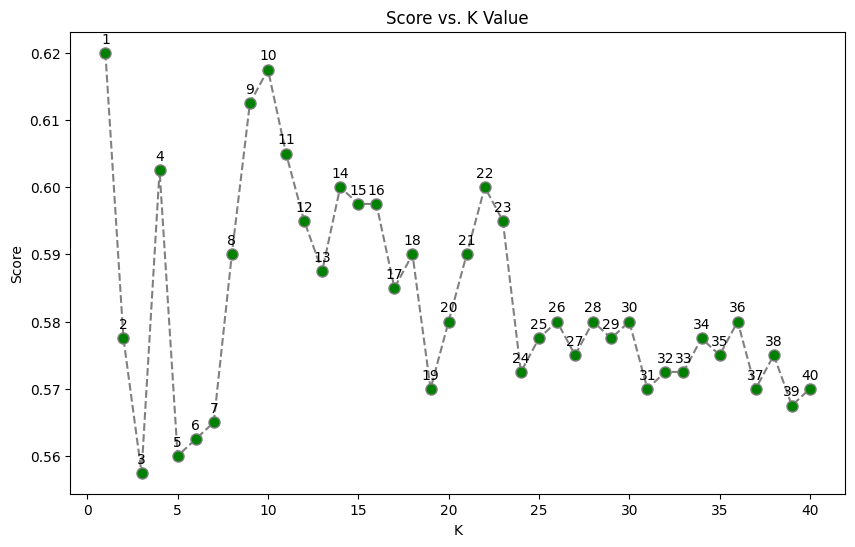

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41), res_score,color='grey', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=8)
plt.title('Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Score')

# Adiciona os valores k acima de cada marcador
for i, err in enumerate(res_score):
    plt.text(i+1, err + 0.001, str(i+1), ha='center', va='bottom', fontsize=10)

plt.show()

## Treine seu modelo novamente com novo valor K

Treine novamente seu modelo com o melhor valor K (até você para decidir o que deseja) e re-faça o relatório de classificação e a matriz de confusão.

#### k=3

In [ ]:
y_pred_3, y_scores_3 = train_modelo(X_train_scaled, X_test_scaled, y_train, k=3)

Treinando o k-NN com k=3


<Figure size 1600x1200 with 0 Axes>

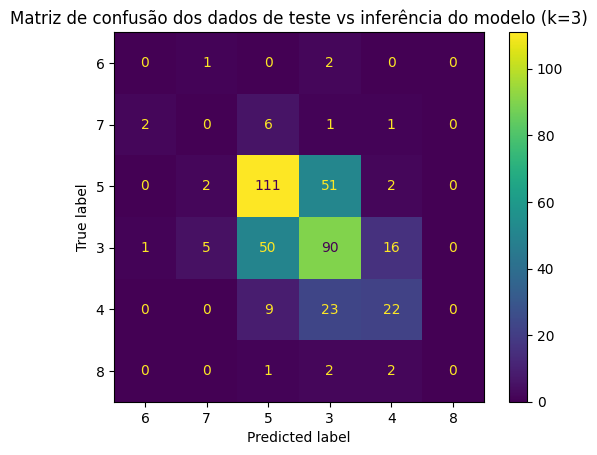

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_3) # matriz de confusão para comparar os valores preditos com os valores reais
cmd = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo (k=3)")
plt.show()

Calculando as probabilidades para o modelo de k=3

In [ ]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        10
           5       0.63      0.67      0.65       166
           6       0.53      0.56      0.54       162
           7       0.51      0.41      0.45        54
           8       0.00      0.00      0.00         5

    accuracy                           0.56       400
   macro avg       0.28      0.27      0.27       400
weighted avg       0.55      0.56      0.55       400



In [ ]:
print(pd.DataFrame(y_scores_3))

       0    1         2         3         4    5
0    0.0  0.0  0.000000  1.000000  0.000000  0.0
1    0.0  0.0  0.333333  0.666667  0.000000  0.0
2    0.0  0.0  0.333333  0.333333  0.333333  0.0
3    0.0  0.0  0.000000  1.000000  0.000000  0.0
4    0.0  0.0  0.000000  0.666667  0.333333  0.0
..   ...  ...       ...       ...       ...  ...
395  0.0  0.0  0.333333  0.666667  0.000000  0.0
396  0.0  0.0  0.666667  0.333333  0.000000  0.0
397  0.0  0.0  0.333333  0.333333  0.333333  0.0
398  0.0  0.0  0.000000  0.000000  1.000000  0.0
399  0.0  0.0  0.000000  0.666667  0.333333  0.0

[400 rows x 6 columns]


Plot da curva ROC

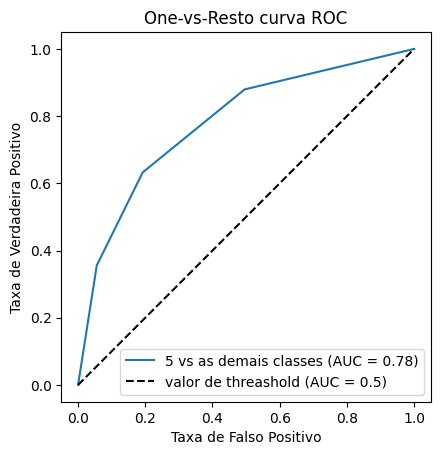

In [ ]:
plot_curva_ROC_one_vs_rest(y_test, y_scores_3)

#### k=4

In [ ]:
y_pred_4, y_scores_4 = train_modelo(X_train_scaled, X_test_scaled, y_train, k=4)

Treinando o k-NN com k=4


<Figure size 1600x1200 with 0 Axes>

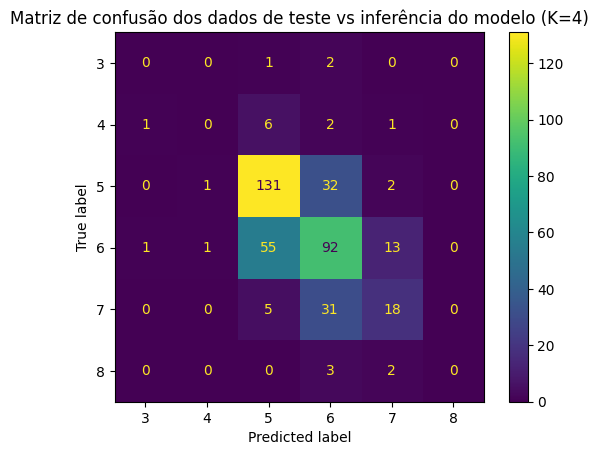

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_4) # matriz de confusão para comparar os valores preditos com os valores reais
cmd = ConfusionMatrixDisplay(cm, display_labels=np.sort(y_test.unique()))
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo (K=4)")
plt.show()

Calculando as probabilidades para o modelo de k=7

In [ ]:
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        10
           5       0.66      0.79      0.72       166
           6       0.57      0.57      0.57       162
           7       0.50      0.33      0.40        54
           8       0.00      0.00      0.00         5

    accuracy                           0.60       400
   macro avg       0.29      0.28      0.28       400
weighted avg       0.57      0.60      0.58       400



In [ ]:
print(pd.DataFrame(y_scores_4))

       0    1     2     3     4    5
0    0.0  0.0  0.25  0.75  0.00  0.0
1    0.0  0.0  0.25  0.75  0.00  0.0
2    0.0  0.0  0.25  0.25  0.50  0.0
3    0.0  0.0  0.00  1.00  0.00  0.0
4    0.0  0.0  0.00  0.50  0.50  0.0
..   ...  ...   ...   ...   ...  ...
395  0.0  0.0  0.25  0.75  0.00  0.0
396  0.0  0.0  0.75  0.25  0.00  0.0
397  0.0  0.0  0.50  0.25  0.25  0.0
398  0.0  0.0  0.00  0.00  1.00  0.0
399  0.0  0.0  0.25  0.50  0.25  0.0

[400 rows x 6 columns]


Plot da curva ROC

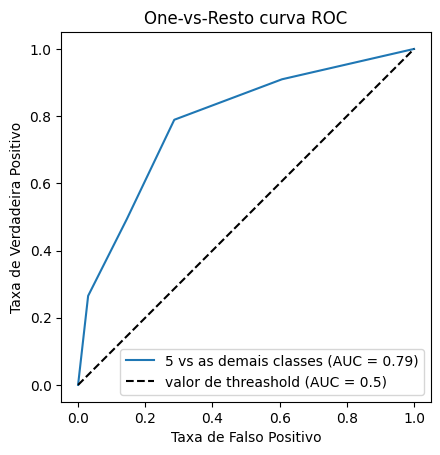

In [ ]:
plot_curva_ROC_one_vs_rest(y_test, y_scores_4)

#### k=10

In [ ]:
y_pred_10, y_scores_10 = train_modelo(X_train_scaled, X_test_scaled, y_train, k=10)

Treinando o k-NN com k=10


<Figure size 1600x1200 with 0 Axes>

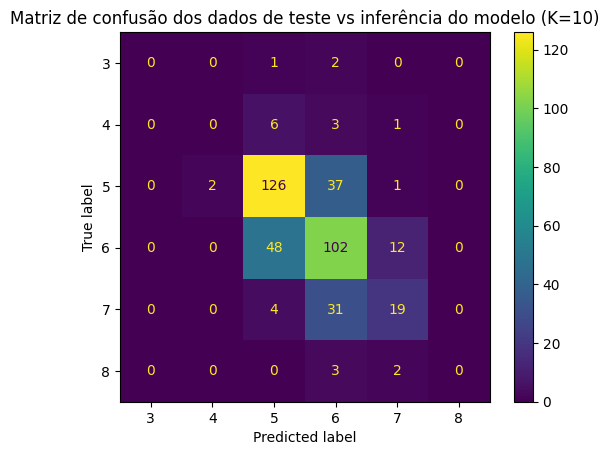

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_10) # matriz de confusão para comparar os valores preditos com os valores reais
cmd = ConfusionMatrixDisplay(cm, display_labels=np.sort(y_test.unique()))
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo (K=10)")
plt.show()

Calculando as probabilidades para o modelo de k=10

In [ ]:
print(classification_report(y_test, y_pred_10))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        10
           5       0.68      0.76      0.72       166
           6       0.57      0.63      0.60       162
           7       0.54      0.35      0.43        54
           8       0.00      0.00      0.00         5

    accuracy                           0.62       400
   macro avg       0.30      0.29      0.29       400
weighted avg       0.59      0.62      0.60       400



In [ ]:
print(pd.DataFrame(y_scores_10))

       0    1    2    3    4    5
0    0.0  0.0  0.5  0.5  0.0  0.0
1    0.0  0.0  0.1  0.7  0.2  0.0
2    0.0  0.0  0.2  0.5  0.2  0.1
3    0.0  0.1  0.1  0.8  0.0  0.0
4    0.0  0.0  0.1  0.6  0.3  0.0
..   ...  ...  ...  ...  ...  ...
395  0.0  0.0  0.4  0.6  0.0  0.0
396  0.0  0.0  0.8  0.2  0.0  0.0
397  0.0  0.0  0.6  0.1  0.3  0.0
398  0.0  0.0  0.1  0.1  0.8  0.0
399  0.0  0.0  0.4  0.5  0.1  0.0

[400 rows x 6 columns]


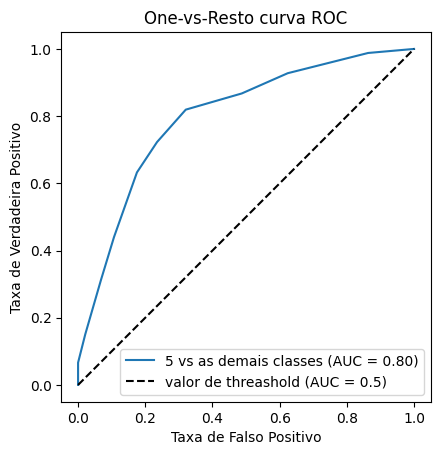

In [ ]:
plot_curva_ROC_one_vs_rest(y_test, y_scores_10)

## Conclusão

De acordo com o gráfico ***Error vs. K Value***, os modelos com menores taxas de erro estão entre 0 e 10, sendo os modelos para *k=1, k=9* e *k=10* os mais eficientes, onde o último obteve a maior ***accuracy*** (*62%*) e a maior ***AUC*** (*0.85*). Observa-se também que para *k<24*, as taxas de erro oscilam muito (*underfitting*), e para *k* maiores, as taxas de erro começam a convergir para *42-44%*. Observando também as matrizes de confusão e as curvas *ROC* para cada modelo, nota-se uma maior eficiência para a previsão da classe 5 (*quality 5*).